In [ ]:
import pandas as pd # ใช้จัดการข้อมูลในรูปแบบ DataFrame
import numpy as np # ใช้คำนวณและจัดการอาร์เรย์
import matplotlib.pyplot as plt # สร้างกราฟ
import seaborn as sns # ใช้สร้างกราฟแบบมีสไตล์
from scipy.stats import zscore # ใช้คำนวณ Z-score เพื่อหา outliers
from sklearn.model_selection import train_test_split # ใช้แบ่งข้อมูลเป็น train และ test
from sklearn.neighbors import KNeighborsRegressor  # ใช้โมเดล K-Nearest Neighbors Regression
from sklearn.linear_model import LinearRegression # ใช้โมเดล Linear Regression
from sklearn.metrics import mean_squared_error, r2_score # ใช้คำนวณค่าความคลาดเคลื่อนและประสิทธิภาพของโมเดล

import requests # ใช้เรียกข้อมูลจากเว็บ

# ดึงข้อมูล CO2 Emissions จากแหล่งข้อมูล ...
co2 = pd.read_csv("https://ourworldindata.org/grapher/annual-co2-emissions-per-country.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
# ดึงข้อมูล Temperature Anomalies จากแหล่งข้อมูล ...
tem = pd.read_csv("https://ourworldindata.org/grapher/country-level-monthly-temperature-anomalies.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# ดึง Metadata ของข้อมูล CO2
metadata = requests.get("https://ourworldindata.org/grapher/annual-co2-emissions-per-country.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

#ข้อมูล Co2 กับ Tem

In [ ]:
# เเสดงข้อมูล CO2 ทั้งหมด
co2

,Entity,Code,Year,emissions_total
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
29132,Zimbabwe,ZWE,2019,10262950.0
29133,Zimbabwe,ZWE,2020,8494503.0
29134,Zimbabwe,ZWE,2021,10203630.0
29135,Zimbabwe,ZWE,2022,10424940.0


In [ ]:
# แสดงข้อมูล Temperature Anomalies ทั้งหมด
tem

,Entity,Code,Year,january,february,march,april,may,june,july,august,september,october,november,december
0,Afghanistan,AFG,1940,-0.789005,-1.594132,-4.561447,-2.868090,-0.813093,0.006361,-0.850492,-1.840513,-1.719229,0.608858,-0.174298,0.167288
1,Afghanistan,AFG,1941,-1.396612,1.839120,0.525898,-0.109256,1.631727,1.473896,0.133833,0.881645,-0.350918,2.870823,0.891722,1.145056
2,Afghanistan,AFG,1942,0.578493,-0.183040,0.761576,0.712292,1.280947,0.068129,0.535709,-0.487333,-0.290590,1.114729,2.106128,-1.931792
3,Afghanistan,AFG,1943,-2.199644,-2.021629,-1.286101,-3.617765,-2.613882,-1.148052,0.082497,-0.607708,-0.366194,-0.684995,0.362292,2.038275
4,Afghanistan,AFG,1944,-0.124280,-0.487659,0.154415,-0.629282,0.376087,-0.226828,1.443995,0.210638,-1.555296,-0.398036,0.714622,-4.114528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16765,Zimbabwe,ZWE,2021,-0.620342,-0.608345,-0.527433,0.041378,-0.920410,0.138378,-0.339581,0.469917,0.426401,-0.534761,1.320452,1.356409
16766,Zimbabwe,ZWE,2022,-1.091358,0.342989,0.074900,0.283844,-0.028898,-0.841010,0.468693,0.761425,0.389101,1.426107,-1.313257,-0.044632
16767,Zimbabwe,ZWE,2023,-0.711325,-0.351366,-0.139116,0.885082,1.678694,2.296919,0.479845,0.411306,1.604187,0.853029,1.347120,1.159834
16768,Zimbabwe,ZWE,2024,-0.053595,2.113007,2.416510,1.236568,1.077959,0.865648,2.694143,1.567293,1.127333,-0.324211,0.701273,2.957548


#Co2

In [ ]:
# จัดการข้อมูลที่มีค่าหายไป (Missing Values)
# ลบแถวที่มีค่า NaN ออกจาก DataFrame
co2.dropna(inplace=True)

# ลบคอลัมน์ที่มีค่า NaN ออกจาก DataFrame
co2.dropna(axis=1, inplace=True)

# แปลงคอลัมน์ 'emissions_total' ให้เป็นประเภท Integer
co2['emissions_total'] = co2['emissions_total'].astype(int)


In [ ]:
# ลบคอลัมน์ 'Code' ที่ไม่จำเป็นออกจาก DataFrame
co2.drop('Code', axis=1, inplace=True)

In [ ]:
#ข้อมูลที่ถูก Clean
co2

,Entity,Year,emissions_total
0,Afghanistan,1949,14656
1,Afghanistan,1950,84272
2,Afghanistan,1951,91600
3,Afghanistan,1952,91600
4,Afghanistan,1953,106256
...,...,...,...
29132,Zimbabwe,2019,10262950
29133,Zimbabwe,2020,8494503
29134,Zimbabwe,2021,10203630
29135,Zimbabwe,2022,10424940


In [ ]:
filtered_co2 = co2[(co2['Year'] >= 2014) & (co2['Year'] <= 2023)]
filtered_co2 #ข้อมูลที่ถูก Sort ให้อยู่ในช่วง 2014 -2023

,Entity,Year,emissions_total
65,Afghanistan,2014,9086037
66,Afghanistan,2015,9670181
67,Afghanistan,2016,8906380
68,Afghanistan,2017,9677441
69,Afghanistan,2018,10601884
...,...,...,...
29132,Zimbabwe,2019,10262950
29133,Zimbabwe,2020,8494503
29134,Zimbabwe,2021,10203630
29135,Zimbabwe,2022,10424940


In [ ]:
average_co2 = filtered_co2.groupby('Year')['emissions_total'].mean().reset_index()
average_co2.columns=['Year','Average CO2 Emissions']
print(average_co2) # แสดงค่าเฉลี่ยของ CO2 Emissions ในแต่ละปี

   Year  Average CO2 Emissions
0  2014           3.215685e+08
1  2015           3.209808e+08
2  2016           3.210162e+08
3  2017           3.261285e+08
4  2018           3.327823e+08
5  2019           3.362109e+08
6  2020           3.198120e+08
7  2021           3.368196e+08
8  2022           3.390211e+08
9  2023           3.431639e+08


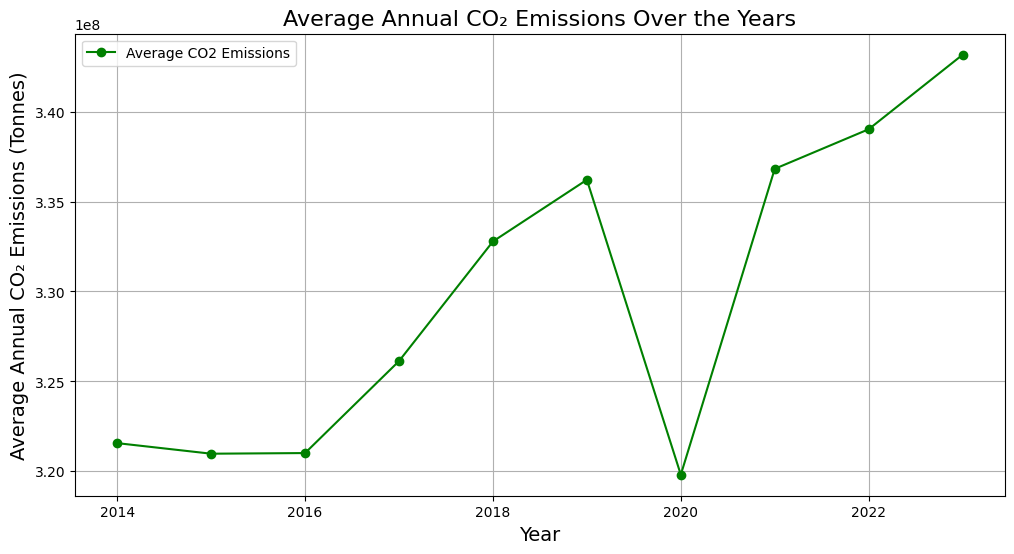

In [ ]:
import matplotlib.pyplot as plt

# คำนวณค่าเฉลี่ยการปล่อย CO2 ต่อปี
average_co2 = filtered_co2.groupby('Year')['emissions_total'].mean().reset_index()

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(average_co2['Year'], average_co2['emissions_total'], marker='o', color='green', label='Average CO2 Emissions')

# ตั้งชื่อกราฟและแกน
plt.title('Average Annual CO₂ Emissions Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Annual CO₂ Emissions (Tonnes)', fontsize=14)

# เพิ่มตารางกริด
plt.grid(True)

# แสดงคำอธิบาย
plt.legend()

# แสดงกราฟ
plt.show()


#Tem

In [ ]:
# ลบคอลัมน์ 'Code'
tem.drop('Code', axis=1, inplace=True)


In [ ]:
tem #ข้อมูลที่ถูก Cleaning

,Entity,Year,january,february,march,april,may,june,july,august,september,october,november,december
0,Afghanistan,1940,-0.789005,-1.594132,-4.561447,-2.868090,-0.813093,0.006361,-0.850492,-1.840513,-1.719229,0.608858,-0.174298,0.167288
1,Afghanistan,1941,-1.396612,1.839120,0.525898,-0.109256,1.631727,1.473896,0.133833,0.881645,-0.350918,2.870823,0.891722,1.145056
2,Afghanistan,1942,0.578493,-0.183040,0.761576,0.712292,1.280947,0.068129,0.535709,-0.487333,-0.290590,1.114729,2.106128,-1.931792
3,Afghanistan,1943,-2.199644,-2.021629,-1.286101,-3.617765,-2.613882,-1.148052,0.082497,-0.607708,-0.366194,-0.684995,0.362292,2.038275
4,Afghanistan,1944,-0.124280,-0.487659,0.154415,-0.629282,0.376087,-0.226828,1.443995,0.210638,-1.555296,-0.398036,0.714622,-4.114528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16765,Zimbabwe,2021,-0.620342,-0.608345,-0.527433,0.041378,-0.920410,0.138378,-0.339581,0.469917,0.426401,-0.534761,1.320452,1.356409
16766,Zimbabwe,2022,-1.091358,0.342989,0.074900,0.283844,-0.028898,-0.841010,0.468693,0.761425,0.389101,1.426107,-1.313257,-0.044632
16767,Zimbabwe,2023,-0.711325,-0.351366,-0.139116,0.885082,1.678694,2.296919,0.479845,0.411306,1.604187,0.853029,1.347120,1.159834
16768,Zimbabwe,2024,-0.053595,2.113007,2.416510,1.236568,1.077959,0.865648,2.694143,1.567293,1.127333,-0.324211,0.701273,2.957548


In [ ]:
filtered_tem = tem[(tem['Year'] >= 2014) & (tem['Year'] <= 2023)]
filtered_tem #ข้อมูลที่ถูก Sort ให้อยู่ในช่วง 2014 -2023

,Entity,Year,january,february,march,april,may,june,july,august,september,october,november,december
74,Afghanistan,2014,0.809240,-3.534234,-0.864283,-0.374297,-0.699911,0.429689,0.225288,0.043789,1.622063,0.571870,-1.125303,0.086660
75,Afghanistan,2015,2.011840,2.576110,-0.771906,0.846243,0.616192,0.555422,0.777449,-0.012484,-1.032629,1.406908,-1.019551,-0.590089
76,Afghanistan,2016,2.352308,1.849127,2.012669,0.056725,2.044374,0.970173,0.711313,-0.515400,2.178091,0.383148,-0.464715,3.338598
77,Afghanistan,2017,0.800050,0.039453,0.467239,1.120643,2.456398,1.933903,1.068663,0.183908,0.651951,1.764279,1.139965,0.422954
78,Afghanistan,2018,2.285960,2.762164,4.233831,1.253383,-0.654446,1.155760,1.647978,0.875258,0.201962,-0.913097,0.230909,1.390206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,Zimbabwe,2019,0.473242,0.698408,1.498501,1.129978,0.436277,0.173004,0.781849,1.495472,-0.895941,1.320953,1.488375,1.937382
16764,Zimbabwe,2020,1.041496,-0.022348,0.024899,1.076286,0.343342,0.034363,-0.204447,0.558973,-0.190611,-0.343191,1.185406,-0.752647
16765,Zimbabwe,2021,-0.620342,-0.608345,-0.527433,0.041378,-0.920410,0.138378,-0.339581,0.469917,0.426401,-0.534761,1.320452,1.356409
16766,Zimbabwe,2022,-1.091358,0.342989,0.074900,0.283844,-0.028898,-0.841010,0.468693,0.761425,0.389101,1.426107,-1.313257,-0.044632


Outliers in january (Z-score):
24       -6.810024
68       -5.595754
84        4.543552
88       -6.157170
349      -6.808681
           ...    
16114    -7.222581
16116    -5.584184
16119    -9.835884
16148    -6.816513
16150   -10.808027
Name: january, Length: 346, dtype: float64
Outliers in february (Z-score):
Series([], Name: february, dtype: float64)
Outliers in march (Z-score):
Series([], Name: march, dtype: float64)
Outliers in april (Z-score):
Series([], Name: april, dtype: float64)
Outliers in may (Z-score):
Series([], Name: may, dtype: float64)
Outliers in june (Z-score):
Series([], Name: june, dtype: float64)
Outliers in july (Z-score):
Series([], Name: july, dtype: float64)
Outliers in august (Z-score):
Series([], Name: august, dtype: float64)
Outliers in september (Z-score):
Series([], Name: september, dtype: float64)
Outliers in october (Z-score):
Series([], Name: october, dtype: float64)
Outliers in november (Z-score):
Series([], Name: november, dtype: float64)
Outliers 

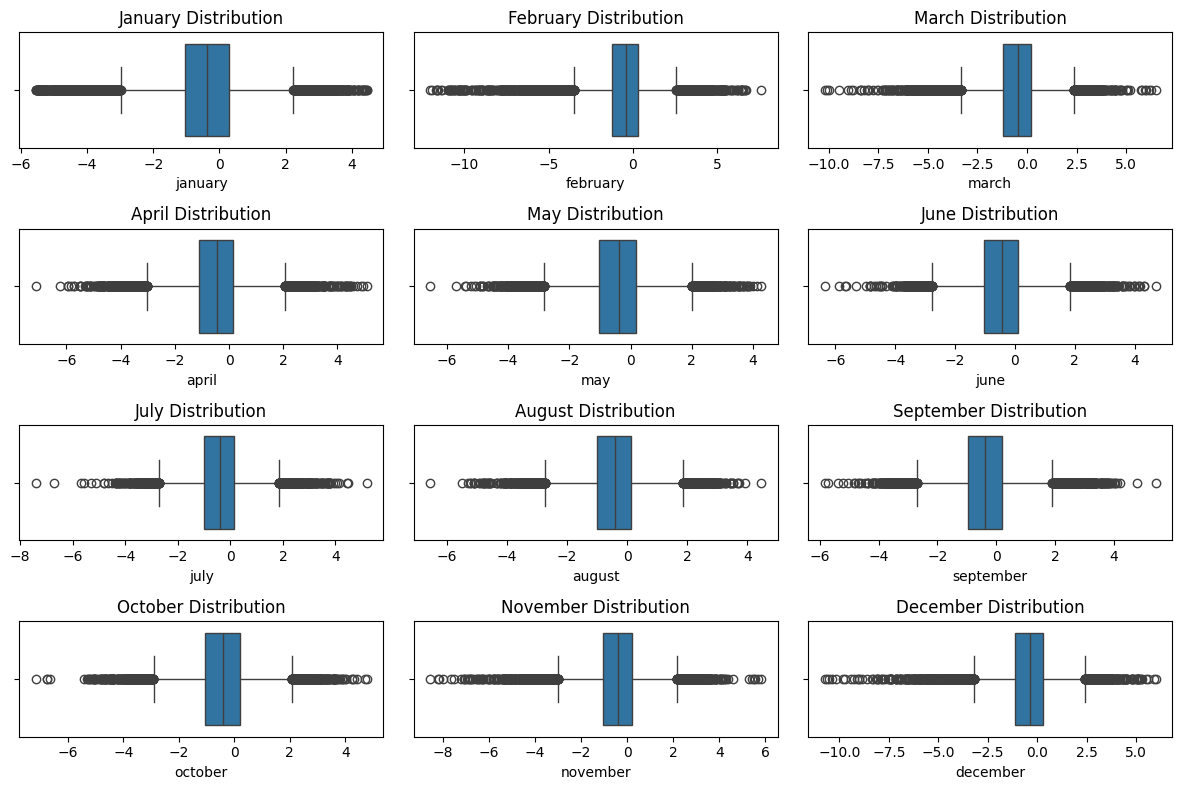

In [ ]:
def detect_outliers_zscore(column):
    z_scores = zscore(column)
    return column[(z_scores > 3) | (z_scores < -3)]

# ตรวจสอบ outliers ในแต่ละเดือน
outliers_z_dict = {}
for month in ['january', 'february', 'march', 'april', 'may', 'june',
              'july', 'august', 'september', 'october', 'november', 'december']:
    outliers_z = detect_outliers_zscore(tem[month])
    outliers_z_dict[month] = outliers_z
    print(f"Outliers in {month} (Z-score):")
    print(outliers_z)

# แทนที่ outliers ด้วยค่ามัธยฐาน
tem_filled = tem.copy()
for month in ['january', 'february', 'march', 'april', 'may', 'june',
              'july', 'august', 'september', 'october', 'november', 'december']:
    median_value = tem[month].median()
    z_scores = zscore(tem[month])
    tem_filled[month] = np.where((z_scores > 3) | (z_scores < -3), median_value, tem_filled[month])

# ตรวจสอบข้อมูลหลังการจัดการกับ outliers
print("\nข้อมูลหลังการจัดการกับ outliers:")
print(tem_filled.describe())

# สร้างกราฟการกระจายตัวของข้อมูลหลังจัดการ outliers
plt.figure(figsize=(12, 8))
for i, month in enumerate(['january', 'february', 'march', 'april', 'may', 'june',
                           'july', 'august', 'september', 'october', 'november', 'december'], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=tem_filled[month])
    plt.title(f'{month.capitalize()} Distribution')
plt.tight_layout()
plt.show()

#Train Test